In [233]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import GradientBoostingClassifier

In [234]:
file_path = "E:\\COMPUTER SCIENCE\\CodSoft_Internship\\Task_1_CodSoft\\Titanic_Dataset.csv"
data = pd.read_csv(file_path)

In [235]:
print("Rows, Columns: ", data.shape)

Rows, Columns:  (891, 12)


In [236]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [237]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [238]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping unnecessary columns

In [239]:
data.drop(columns = "Cabin", 
          axis = 1, 
          inplace = True)
#As 'Cabin' has about 687 null values.
print(data.shape)
#'Cabin' has been dropped. So number of columns has come down from 12 to 11.

(891, 11)


Checking for survived people

In [240]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Visualization of survival of passengers

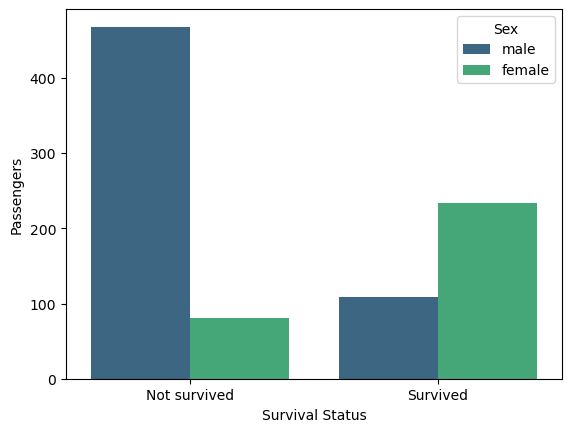

In [241]:
sns.countplot(x = 'Survived', 
              data = data ,
              hue='Sex',
              palette='viridis')
plt.xlabel("Survival Status")
plt.ylabel("Passengers")
plt.xticks(ticks = [0,1],
           labels=['Not survived',
                   'Survived'])
plt.show()

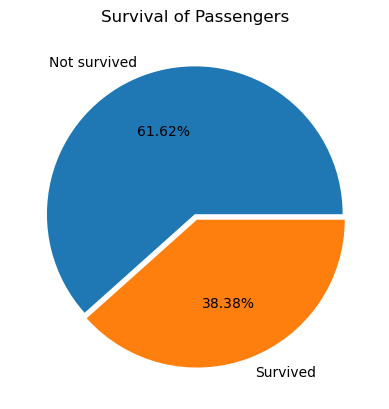

In [242]:
plt.pie(data['Survived'].value_counts(),
        explode = [0,0.04],
        autopct="%1.2f%%",
        labels=['Not survived','Survived'])
plt.title("Survival of Passengers")
plt.show()

Visualization of people Alive of both genders

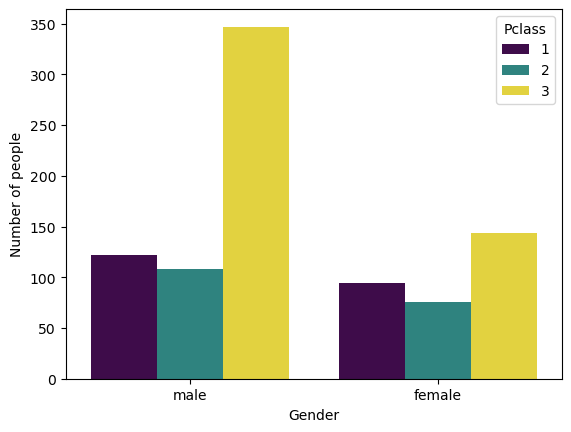

In [243]:
sns.countplot(x = 'Sex',
              data = data,
              hue = 'Pclass',
              palette='viridis',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

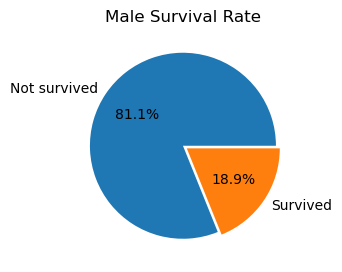

In [244]:
data[data['Sex'] == 'male'].Survived.groupby(data.Survived).count().plot(kind='pie',
figsize = (3, 6), explode = [0,0.05], autopct = '%1.1f%%', labels = ["Not survived", "Survived"])
plt.ylabel("")
plt.title("Male Survival Rate")
plt.show()

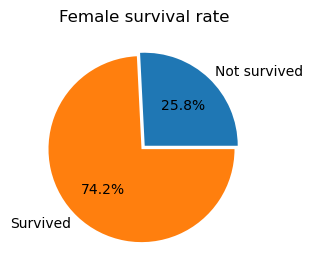

In [245]:
data[data['Sex'] == 'female'].Survived.groupby(data.Survived).count().plot(kind='pie',
figsize = (3, 6), explode = [0,0.05], autopct = '%1.1f%%', labels = ["Not survived", "Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

Females have survived more than their Male counterparts.

Share of population in different passenger class

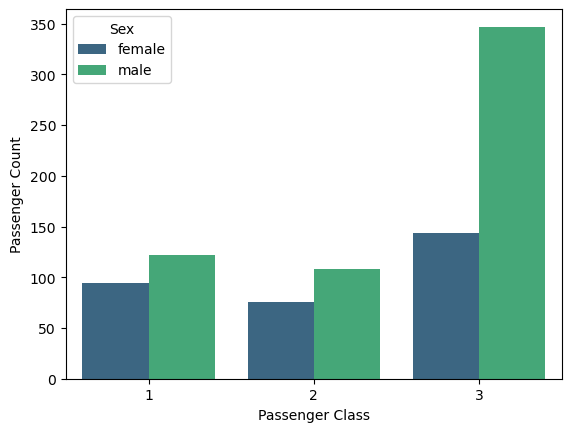

In [246]:
sns.countplot(x = 'Pclass', 
              data = data,
              hue = 'Sex', 
              palette='viridis',)
plt.xlabel("Passenger Class")
plt.ylabel("Passenger Count")
plt.show()

Distribution chart of Fare & Age

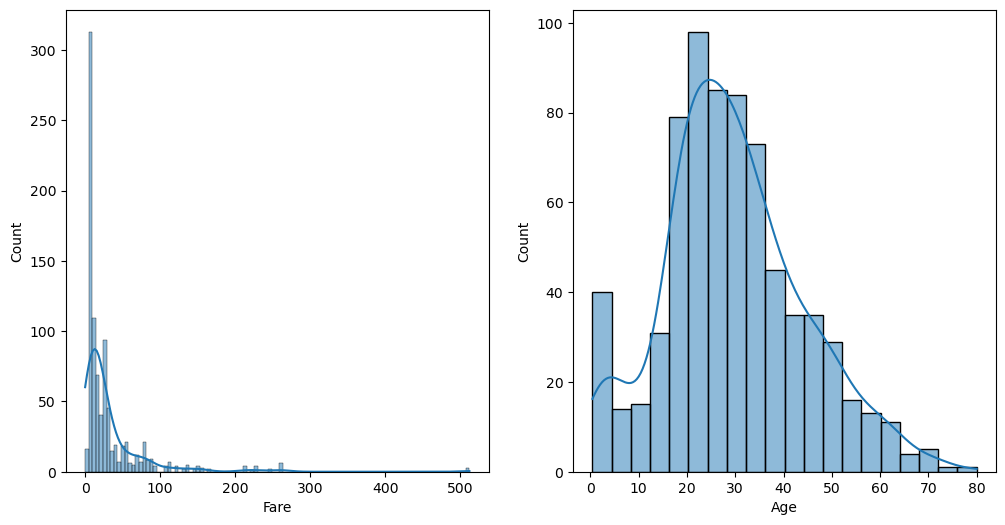

In [247]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data['Fare'], 
             kde = True,
             ax = axes[0])
sns.histplot(data['Age'].dropna(),
             kde = True, ax = axes[1])
plt.show()

Plotting the survival rate in different age category

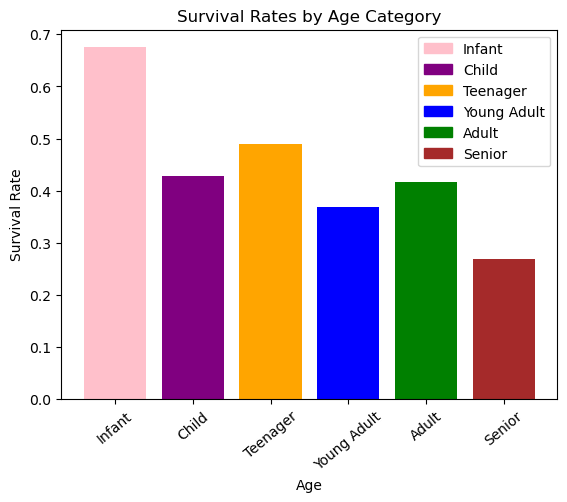

In [248]:
silos = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

data['Age_categories'] = pd.cut(data['Age'], 
                                bins = silos, 
                                labels = label_names,
                                right = False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = data.pivot_table(index = "Age_categories", values="Survived",
                                observed=False)

# Define colors for each bar
colors = ['pink', 'purple', 'orange', 'blue', 'green', 'brown']

#Plotting
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], 
              color = colors)
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

In [249]:
#Numerical columns within our dataset
data_num = data[['Fare',
                 'Parch',
                 'SibSp',
                 'Age',
                 'Sex',
                 'Pclass',
                 'Embarked',
                 'Survived']]
print(data_num)

        Fare  Parch  SibSp   Age     Sex  Pclass Embarked  Survived
0     7.2500      0      1  22.0    male       3        S         0
1    71.2833      0      1  38.0  female       1        C         1
2     7.9250      0      0  26.0  female       3        S         1
3    53.1000      0      1  35.0  female       1        S         1
4     8.0500      0      0  35.0    male       3        S         0
..       ...    ...    ...   ...     ...     ...      ...       ...
886  13.0000      0      0  27.0    male       2        S         0
887  30.0000      0      0  19.0  female       1        S         1
888  23.4500      2      1   NaN  female       3        S         0
889  30.0000      0      0  26.0    male       1        C         1
890   7.7500      0      0  32.0    male       3        Q         0

[891 rows x 8 columns]


In [250]:
#Impute based on median
data['Age'] = data['Age'].fillna(value = data['Age'].median())

#'Embarked' is not very important for our model
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

Removing Outliers

In [251]:
#Using Quartiles to detect outliers
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
Age = Q3_age - Q1_age

# use quartile +/- 1.5*IQR to detect outliers
age_outliers = data[(data['Age'] < (Q1_age - 1.5 * Age)) | (data['Age'] > (Q3_age + 1.5 * Age))]

# use quartiles to detect outliers
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
Fare_ = Q3_fare - Q1_fare

# use quartile +/- 1.5*IQR to detect outliers
fare_outliers = data[(data['Fare'] < (Q1_fare - 1.5 * Fare_)) | (data['Fare'] > (Q3_fare + 1.5 * Fare_))]

# combining outliers
outliers = pd.concat([age_outliers, fare_outliers]).drop_duplicates()

# Removing all outliers
data = data[~data.index.isin(outliers.index)]
print(f"Outlier has been removed in 'Age' where age is lower than {Q1_age - 1.5 * Age} or higher than {Q3_age + 1.5 * Age}")
print(f"Outlier has been removed in 'Fare' where age is lower than {Q1_fare - 1.5 * Fare_} or higher than {Q3_fare + 1.5 * Fare_}")

Outlier has been removed in 'Age' where age is lower than 2.5 or higher than 54.5
Outlier has been removed in 'Fare' where age is lower than -26.724 or higher than 65.6344


In [252]:
print(f"Checking for NULL values: \n\n{data.isnull().sum()}")

Checking for NULL values: 

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Age_categories    162
dtype: int64


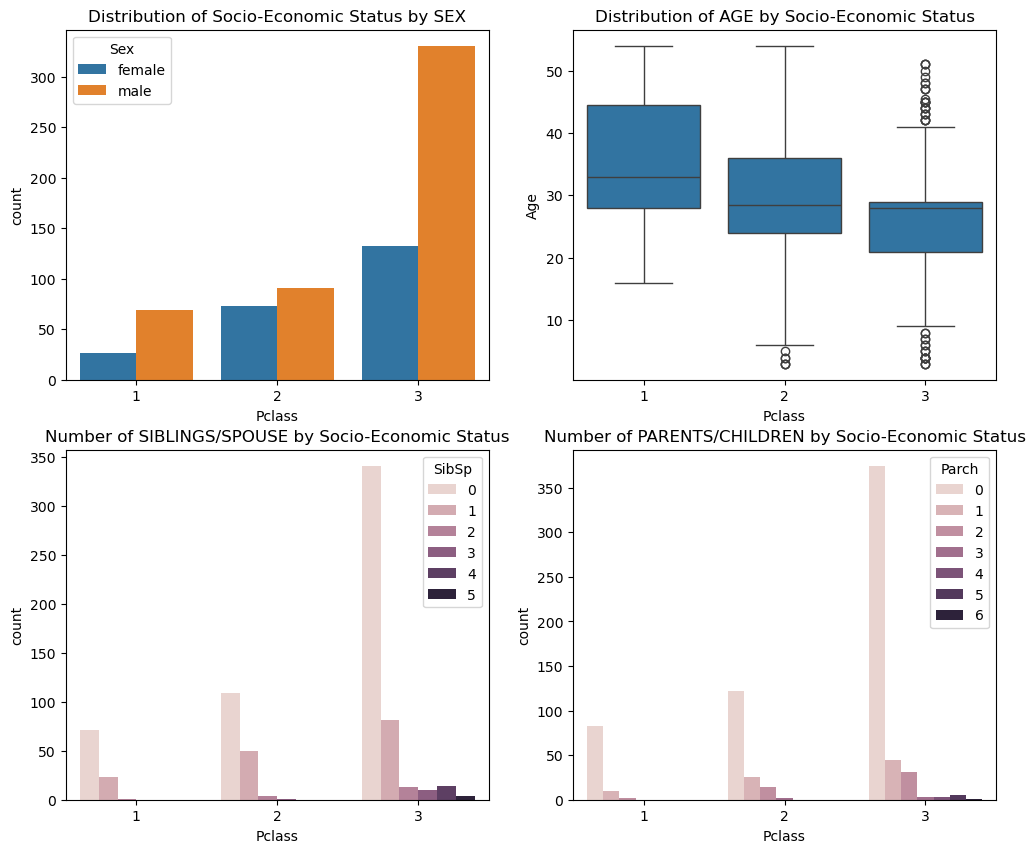

In [253]:
# Plotting the Socio-economic status of passengers on-board
fig, axs = plt.subplots(2, 2, figsize = (12, 10))

#0,0
sns.countplot(ax = axs[0, 0], x='Pclass', hue='Sex', data = data)
axs[0, 0].set_title('Distribution of Socio-Economic Status by SEX')

#0,1
sns.boxplot(ax = axs[0, 1], x = 'Pclass', y = 'Age', data = data)
axs[0, 1].set_title('Distribution of AGE by Socio-Economic Status')

#1,0
sns.countplot(ax = axs[1, 0], x = 'Pclass', hue = 'SibSp', data = data)
axs[1, 0].set_title('Number of SIBLINGS/SPOUSE by Socio-Economic Status')

#1,1
sns.countplot(ax = axs[1, 1], x = 'Pclass', hue = 'Parch', data = data)
axs[1, 1].set_title('Number of PARENTS/CHILDREN by Socio-Economic Status')

plt.show()

Calculating the surival rate

In [254]:
#Duplicate the original data
data_1 = data.copy()
#Selecting the Column 'Sex' and assign MALE to 0 and FEMALE to 1
data_1['Sex'] = data_1['Sex'].map({'male': 0, 'female': 1})
#Selecting the Column 'Embarked' & assign 'C' to 0, 'Q' to 1, 'S' to 2
data_1['Embarked'] = data_1['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print("Passed")

Passed


In [255]:
#Data Cleaning
data['Age'] = data['Age'].fillna(value = data['Age'].median())
data['Fare'] = data['Fare'].fillna(value = data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(value = data['Embarked'].mode()[0])
print("passed")

passed


In [256]:
# Converting important non-numeric values into numeric vales (ease)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [257]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[features]
Y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)
# random_state is used to ensures data is taken in the same way each time at the same speed

In [258]:
age_outliers = X_train[(X_train['Age'] < (Q1_age - 1.5 * Age)) | (X_train['Age'] > (Q3_age + 1.5 * Age))]
# Same equation as used for Age
fare_outliers = X_train[(X_train['Fare'] < (Q1_fare - 1.5 * Fare_)) | (X_train['Fare'] > (Q3_fare + 1.5 * Fare_))]
# Combining both outlier to remove them  from training data in order to have clearer metrics to train
outliers = pd.concat([age_outliers, fare_outliers]).drop_duplicates()
# Removing outliers from X_train and Y_train
X_train = X_train[~X_train.index.isin(outliers.index)]
Y_train = Y_train[~Y_train.index.isin(outliers.index)]
print("Passed")

Passed


Models Used:
1) K_nearest Neighbbour
2) Logistic Regression
3) Gradient Boosting Classifier

K-Nearest-Neigbors

In [259]:
#Finding the five nearest neighbours
knn = KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(knn, X_train, Y_train, cv=5)
print("Cross-Validation scores: ", cv_scores)
print("Average Cross-Validation score: ", cv_scores.mean())
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors (KNN) Model: ")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_knn):.4f}")
precision_knn = precision_score(Y_test, y_pred_knn)
recall_knn = recall_score(Y_test, y_pred_knn)
f1_knn = f1_score(Y_test, y_pred_knn)
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F-score: {f1_knn:.4f}")

Cross-Validation scores:  [0.71551724 0.73043478 0.62608696 0.73043478 0.68695652]
Average Cross-Validation score:  0.6978860569715142

K-Nearest Neighbors (KNN) Model: 
Accuracy: 0.7517
Precision: 0.6522
Recall: 0.6000
F-score: 0.6250


Logistic Regression

In [260]:
lr = LogisticRegression()
# 5-fold cross-validation on the training set:
cv_scores = cross_val_score(lr, X_train, Y_train, cv=5)
print("Cross-Validation scores: ", cv_scores)
print("Average Cross-Validation score: ", cv_scores.mean())

lr.fit(X_train, Y_train)
Y_pred_logreg = lr.predict(X_test)
print("\nLogistic Regression Model: ")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_logreg):.4f}")

# Precision, Recall, F-score of the model:
precision_logreg = precision_score(Y_test, Y_pred_logreg)
recall_logreg = recall_score(Y_test, Y_pred_logreg)
f1_logreg = f1_score(Y_test, Y_pred_logreg)
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F-score: {f1_logreg:.4f}")

Cross-Validation scores:  [0.84482759 0.8        0.79130435 0.79130435 0.69565217]
Average Cross-Validation score:  0.7846176911544227

Logistic Regression Model: 
Accuracy: 0.7793
Precision: 0.6875
Recall: 0.6600
F-score: 0.6735


Gradient Boosting Classifier

In [261]:
gb = GradientBoostingClassifier(n_estimators=100, 
                                random_state=1)
cv_scores = cross_val_score(gb, X_train, Y_train, cv=5)
print("Cross-Validation scores: ", cv_scores)
print("Average Cross-Validation score: ", cv_scores.mean())
gb.fit(X_train, Y_train)
y_pred_gbc = gb.predict(X_test)
print("\nGradient Boosting Classifier (GB) Model: ")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_gbc):.4f}")
precision_gb = precision_score(Y_test, y_pred_gbc)
recall_gb = recall_score(Y_test, y_pred_gbc)
f1_gb = f1_score(Y_test, y_pred_gbc)
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F-score: {f1_gb:.4f}")

Cross-Validation scores:  [0.8362069  0.86086957 0.8173913  0.88695652 0.75652174]
Average Cross-Validation score:  0.8315892053973013

Gradient Boosting Classifier (GB) Model: 
Accuracy: 0.7724
Precision: 0.6809
Recall: 0.6400
F-score: 0.6598


Findings: 
1) Gender disparity in Survival [Females survived more than Male counterparts].
2) Males from Class_3 had the lowest survival rate.
3) Young adults had the least survival rate, indicating that age played a pivotal role in survival outcomes.
4) Population of passengers in Class_3 was the highest, they had the lowest survival rate.